# Data Exploration and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
sys.path.append("../src/")

In [3]:
import plotting_funcs as pf

## Load raw training data

In [4]:
df_train_raw = pd.read_csv('../data/train.csv')

In [5]:
df_train_raw.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [6]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
CAL     30143 non-null float64
CNC     30143 non-null float64
GR      30143 non-null float64
HRD     30143 non-null float64
HRM     30143 non-null float64
PE      30143 non-null float64
ZDEN    30143 non-null float64
DTC     30143 non-null float64
DTS     30143 non-null float64
dtypes: float64(9)
memory usage: 2.1 MB


In [7]:
df_train_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,30143.0,-8.394576,129.970219,-999.0,8.05835,8.6250,9.04885,21.0642
CNC,30143.0,-23.692615,157.142679,-999.0,0.12280,0.1936,0.33715,3490.1582
GR,30143.0,38.959845,108.504554,-999.0,17.24875,36.8218,58.34615,1470.2534
HRD,30143.0,3.977690,365.112753,-999.0,0.71770,1.6230,3.15830,10000.0000
HRM,30143.0,1.547299,456.908969,-999.0,0.71205,1.6281,3.28060,60467.7617
PE,30143.0,-17.446739,149.083136,-999.0,0.05310,4.9415,7.85665,28.1064
ZDEN,30143.0,-20.229982,148.809506,-999.0,2.22670,2.4322,2.55135,3.2597
DTC,30143.0,-54.891703,372.858812,-999.0,66.30435,78.3551,107.02250,155.9803
DTS,30143.0,-9.737567,440.314119,-999.0,118.53435,137.6893,182.97315,487.4384


## Replace -999.0 with np.nan

In [8]:
df_train_raw.replace(to_replace=-999.0, value=np.nan, inplace=True)

In [9]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
CAL     29633 non-null float64
CNC     29408 non-null float64
GR      29889 non-null float64
HRD     29758 non-null float64
HRM     29758 non-null float64
PE      29464 non-null float64
ZDEN    29462 non-null float64
DTC     26089 non-null float64
DTS     25278 non-null float64
dtypes: float64(9)
memory usage: 2.1 MB


In [10]:
df_train_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,29633.0,8.654281,1.749145,5.9304,8.135600,8.62500,9.063000,21.0642
CNC,29408.0,0.683437,30.689679,-0.1028,0.127100,0.19850,0.343100,3490.1582
GR,29889.0,47.780541,51.377519,-0.1460,18.026100,37.08220,58.532800,1470.2534
HRD,29758.0,16.953912,349.067878,0.0541,0.740450,1.66275,3.180350,10000.0000
HRM,29758.0,14.492077,445.361622,0.0616,0.734700,1.66515,3.308900,60467.7617
PE,29464.0,5.173227,4.781088,-0.0232,0.054200,5.04250,7.949700,28.1064
ZDEN,29462.0,2.393818,0.196276,-1.9238,2.234800,2.43960,2.553000,3.2597
DTC,26089.0,91.814381,24.337910,49.9705,71.357000,85.23760,112.112600,155.9803
DTS,25278.0,180.655730,81.141960,80.5804,129.446625,144.59305,191.475125,487.4384


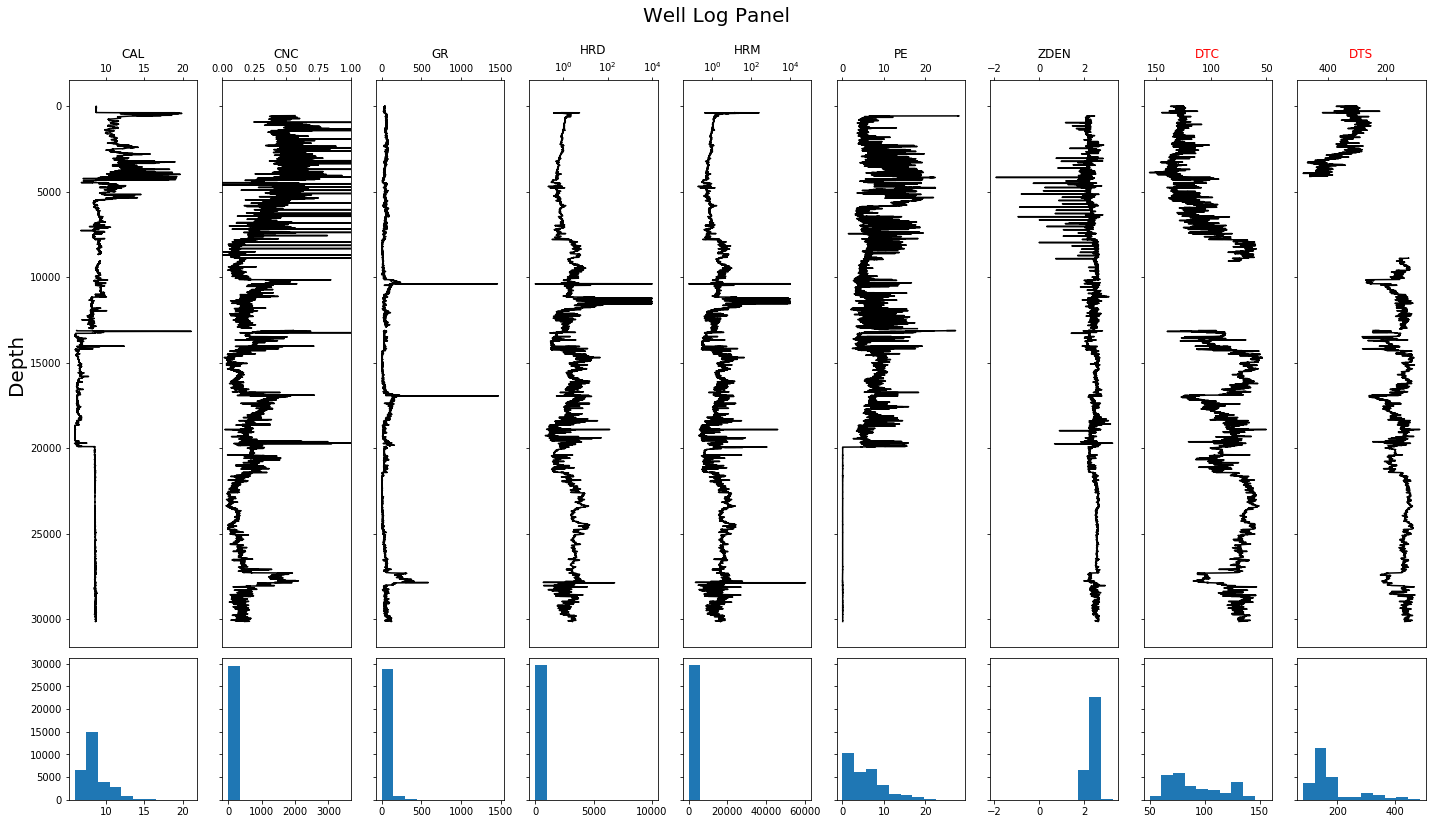

In [11]:
pf.plot_well_curves(df_train_raw, hist=True)
plt.savefig('../img/train_raw_well_log_panel.png')

## Set limit clips

In [12]:
df_train_raw.loc[df_train_raw['CNC'] < 0.0, 'CNC'] = 0.0
df_train_raw.loc[df_train_raw['CNC'] > 1.0, 'CNC'] = 0.0
df_train_raw.loc[df_train_raw['GR'] < 0.0, 'GR'] = 0.0
df_train_raw.loc[df_train_raw['GR'] > 300.0, 'GR'] = 300.0
df_train_raw.loc[df_train_raw['PE'] < 0.0, 'PE'] = 0
df_train_raw.loc[df_train_raw['ZDEN'] < 0.0, 'ZDEN'] = 0.0

In [16]:
df_train_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAL,29633.0,8.654281,1.749145,5.9304,8.135600,8.62500,9.063000,21.0642
CNC,29408.0,0.246304,0.155703,0.0000,0.126300,0.19735,0.339925,0.9997
GR,29889.0,47.155652,45.229153,0.0000,18.026100,37.08220,58.532800,300.0000
HRD,29758.0,16.953912,349.067878,0.0541,0.740450,1.66275,3.180350,10000.0000
HRM,29758.0,14.492077,445.361622,0.0616,0.734700,1.66515,3.308900,60467.7617
PE,29464.0,5.173231,4.781084,0.0000,0.054200,5.04250,7.949700,28.1064
ZDEN,29462.0,2.394011,0.193335,0.0000,2.234800,2.43960,2.553000,3.2597
DTC,26089.0,91.814381,24.337910,49.9705,71.357000,85.23760,112.112600,155.9803
DTS,25278.0,180.655730,81.141960,80.5804,129.446625,144.59305,191.475125,487.4384


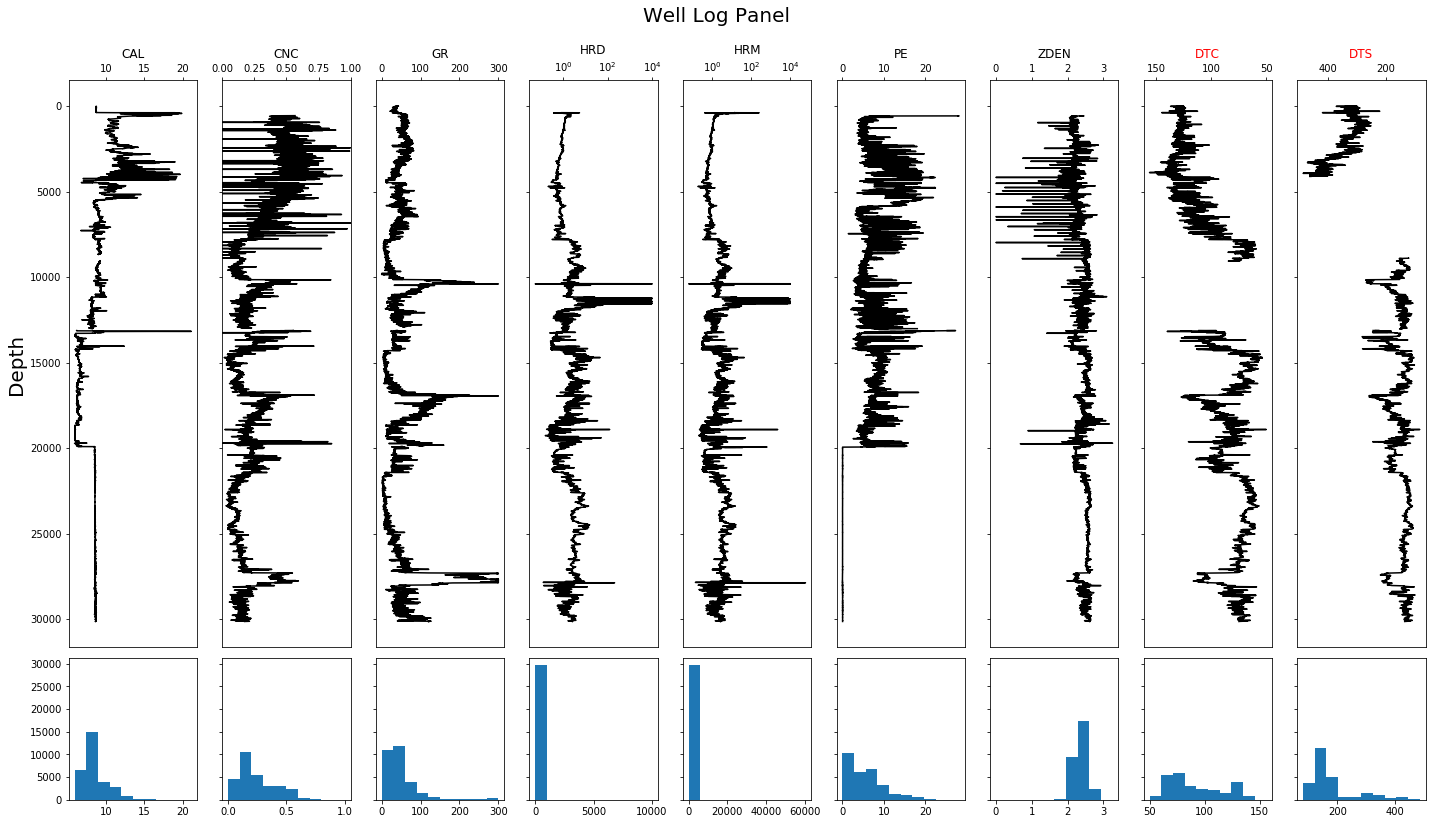

In [14]:
pf.plot_well_curves(df_train_raw, hist=True)
plt.savefig('../img/train_raw_val_clips_well_log_panel.png')

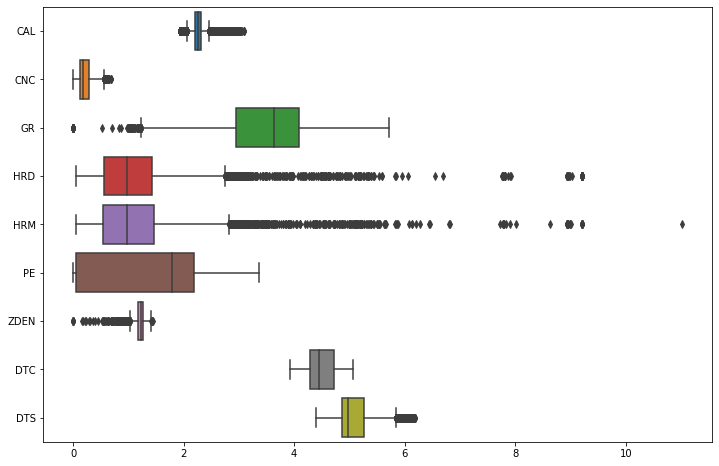

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(data=df_train_raw.apply(np.log1p), orient='h', ax=ax)
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mms = MinMaxScaler().fit(df_train_raw)

In [26]:
df_train_raw_mms = pd.DataFrame(data=mms.transform(df_train_raw), columns=df_train_raw.columns)

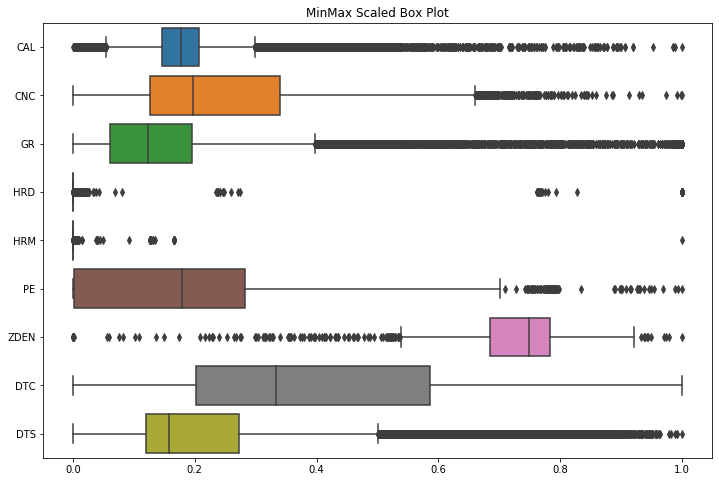

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.boxplot(data=df_train_raw_mms, orient='h', ax=ax)
ax.set_title('MinMax Scaled Box Plot')
plt.savefig('../img/train_raw_val_clipped_minmax_boxplot.png')

## Apply IQR filter

In [44]:
#df_train_iqr = pf.iqr_filter(df_train_raw_mms)
df_train_iqr = pf.iqr_filter(df_train_raw.apply(np.log1p))
#df_train_iqr = pd.DataFrame(data=mms.inverse_transform(df_train_iqr), columns=df_train_raw.columns)
df_train_iqr = df_train_iqr.apply(np.expm1)

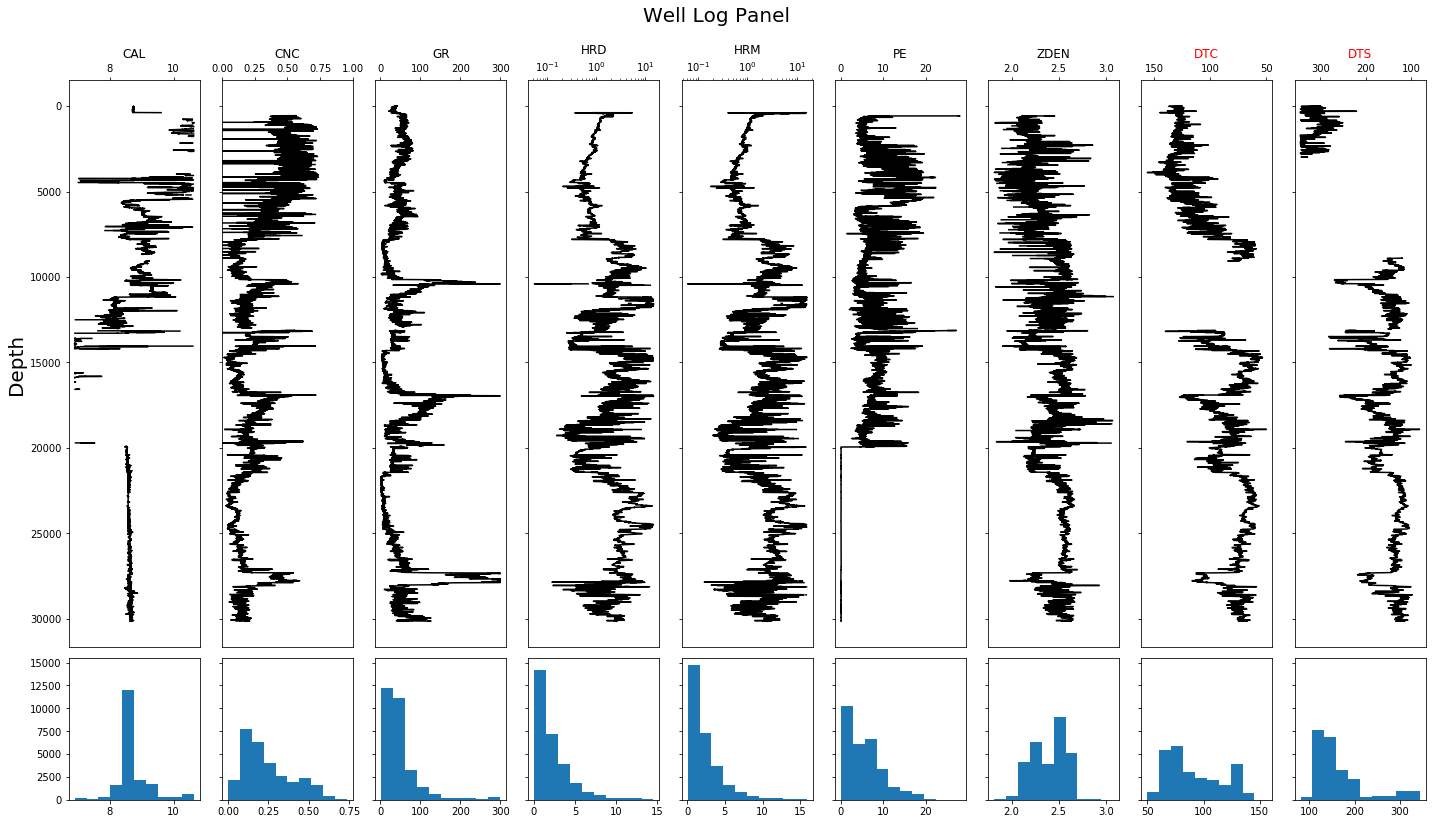

In [49]:
pf.plot_well_curves(df_train_iqr, hist=True)
plt.savefig('../img/train_iqr_well_log_panel.png')

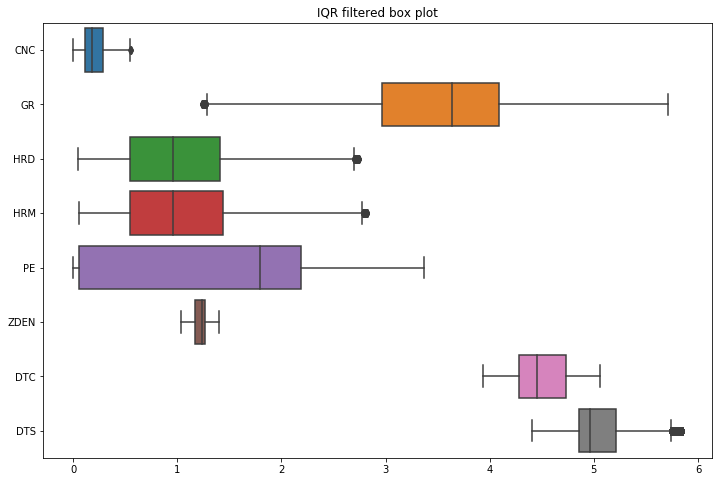

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
#sns.boxplot(data=mms.transform(df_train_iqr), orient='h', ax=ax)
sns.boxplot(data=df_train_iqr.drop(labels='CAL', axis=1).apply(np.log1p), orient='h', ax=ax)
ax.set_title('IQR filtered box plot')
#plt.show()
plt.savefig('../img/train_iqr_filt_boxplot.png')

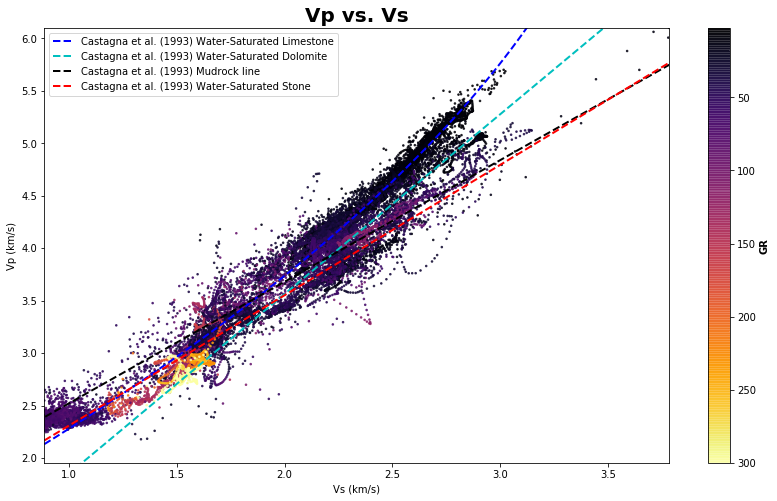

In [54]:
pf.plot_vp_vs(x='DTC', y='DTS', color='GR', df=df_train_iqr)
plt.show()